In [2]:
import numba
import sys
sys.path.insert(0, './python_lib')
import networkx as nx
import numpy as np
import graph_gen
import model
import random
from collections import defaultdict
import torch
import math


In [3]:
%matplotlib inline

In [61]:
m = n = l = 4 # L of square grid

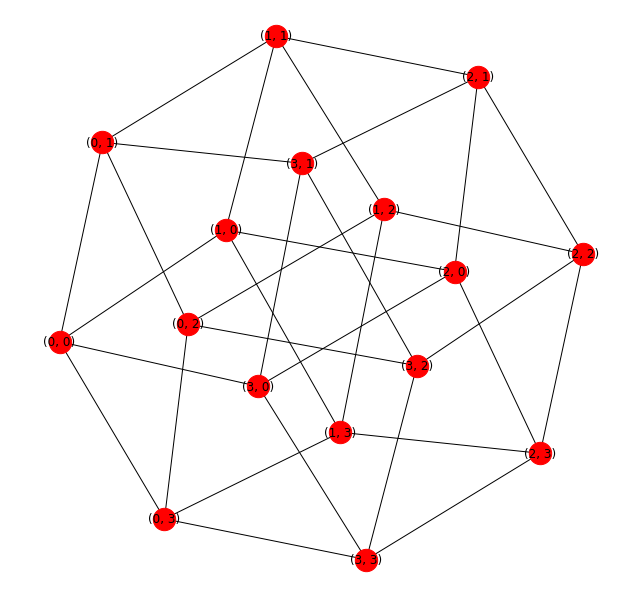

In [62]:
periodic = True
N, J_interaction = graph_gen.grid_2d_interaction(n,m, periodic=periodic)

In [63]:
j_start = 1
h_start = 1
betas = np.arange(1e-4,1,0.1)

j = graph_gen.fixed_value(j_start)
J = graph_gen.set_J(J_interaction, j)

#J_rand = graph_gen.set_J(J_interaction_rand, j)

h = h_start
H = np.full((N,), h)

tree = model.model(N, H, J, J_interaction)

fe_ex = []
ener_ex = []
m_ex = []

for beta in betas:
    tree.exact(beta)
    fe_ex.append(tree.free_energy)
    ener_ex.append(tree.E_mean)
    m_ex.append(tree.M_mean)


Enumerating...
65000 / 65536(99.18%), E = -10.0, Z = 6.5e+04, F = -1.11e+05
Energy: -0.0003 
M: 0.0001 
S: 0.693
Free_energy: -6931.472 (-6931.472)
Enumerating...
65000 / 65536(99.18%), E = -10.0, Z = 8.35e+04, F = -1.13e+02
Energy: -0.4 
M: 0.155 
S: 0.671
Free_energy: -7.104 (-7.104)
Enumerating...
65000 / 65536(99.18%), E = -10.0, Z = 2.29e+05, F = -61.7
Energy: -1.23 
M: 0.48 
S: 0.542
Free_energy: -3.936 (-3.936)
Enumerating...
65000 / 65536(99.18%), E = -10.0, Z = 1.94e+06, F = -48.2
Energy: -2.27 
M: 0.821 
S: 0.283
Free_energy: -3.217 (-3.217)
Enumerating...
65000 / 65536(99.18%), E = -10.0, Z = 4.15e+07, F = -43.8
Energy: -2.77 
M: 0.948 
S: 0.115
Free_energy: -3.054 (-3.054)
Enumerating...
65000 / 65536(99.18%), E = -10.0, Z = 1.37e+09, F = -42.1
Energy: -2.92 
M: 0.984 
S: 0.0462
Free_energy: -3.015 (-3.015)
Enumerating...
65000 / 65536(99.18%), E = -10.0, Z = 5.4e+10, F = -41.2
Energy: -2.97 
M: 0.995 
S: 0.0187
Free_energy: -3.004 (-3.004)
Enumerating...
65000 / 65536(99.1

In [64]:
import bp_nn
imp.reload(bp_nn)


fe_nn = []
ener_nn = []
m_nn = []
net = bp_nn.bp_nn(N, tree, True)
for beta in betas:
    
    net.train(beta = beta, max_step=1000,
              lr=0.005,
             std_fe_limit=0.001)
    net.compute_stat(beta, batch_size = 100000)
    fe_nn.append(net.F_mean)
    ener_nn.append(net.E_mean)
    m_nn.append(net.M_mean)



 0.00 543 fe: -6931.472 +- 0.001 M: 0.00263
 0.10 1000 fe: -7.103 +- 0.030 M: 0.157
 0.20 1000 fe: -3.931 +- 0.044 M: 0.49
 0.30 1000 fe: -3.217 +- 0.024 M: 0.828
 0.40 1000 fe: -3.053 +- 0.007 M: 0.95
 0.50 1000 fe: -3.015 +- 0.003 M: 0.987
 0.60 317 fe: -3.004 +- 0.001 M: 0.996
 0.70 201 fe: -3.001 +- 0.001 M: 0.998
 0.80 193 fe: -3.001 +- 0.001 M: 0.999
 0.90 53 fe: -3.000 +- 0.000 M: 1.0
free_energy: -3.000,  std_fe: 0.006, mag_mean: 0.999, entropy: 0.003 energy: -2.997

In [65]:
imp.reload(bp_solver)
import bp_solver

fe_bp = []
ener_bp = []
m_bp = []
BP_tree = bp_solver.BP_solver(tree) 

for beta in betas:
    
    BP_tree.converge(beta, error = 1e-6)
    fe_bp.append(BP_tree.F)
    ener_bp.append(BP_tree.E_mean)
    m_bp.append(BP_tree.M_mean)


 iter:3,  err: 0.000 free_energy -6931.47
 bp 
 fe: -6931.472, ener: -0.000, M: 0.000
 iter:9,  err: 0.000 free_energy -7.10
 bp 
 fe: -7.103, ener: -0.394, M: 0.155
 iter:14,  err: 0.000 free_energy -3.93
 bp 
 fe: -3.929, ener: -1.216, M: 0.489
 iter:12,  err: 0.000 free_energy -3.21
 bp 
 fe: -3.214, ener: -2.286, M: 0.828
 iter:9,  err: 0.000 free_energy -3.05
 bp 
 fe: -3.054, ener: -2.768, M: 0.949
 iter:7,  err: 0.000 free_energy -3.01
 bp 
 fe: -3.015, ener: -2.923, M: 0.984
 iter:6,  err: 0.000 free_energy -3.00
 bp 
 fe: -3.004, ener: -2.973, M: 0.995
 iter:5,  err: 0.000 free_energy -3.00
 bp 
 fe: -3.001, ener: -2.990, M: 0.998
 iter:5,  err: 0.000 free_energy -3.00
 bp 
 fe: -3.000, ener: -2.997, M: 0.999
 iter:4,  err: 0.000 free_energy -3.00
 bp 
 fe: -3.000, ener: -2.999, M: 1.000


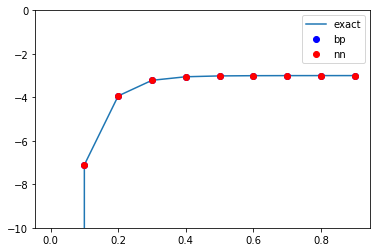

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
x = betas
plt.plot(x, fe_ex, label = "exact")
plt.plot(x, fe_bp, "bo", label="bp")
plt.plot(x, fe_nn, "ro", label="nn")
plt.legend()
plt.ylim(-10,0)
plt.show()

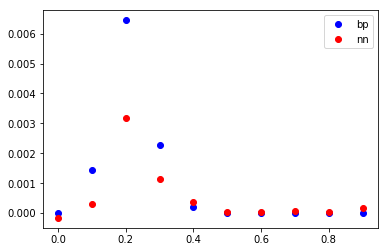

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
x = betas
fe_ex = np.array(fe_ex)
fe_bp = np.array(fe_bp)
fe_nn = np.array(fe_nn)

plt.plot(x, fe_bp - fe_ex, "bo", label="bp")
plt.plot(x, fe_nn - fe_ex, "ro", label="nn")
plt.legend()
plt.show()

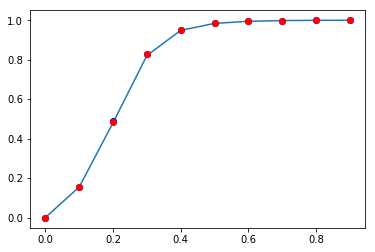

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline
x = betas
plt.plot(x, m_ex, label = "exact")
plt.plot(x,m_bp, "bo", label="bp")
plt.plot(x,m_nn, "ro", label="nn")
plt.legend
plt.show()

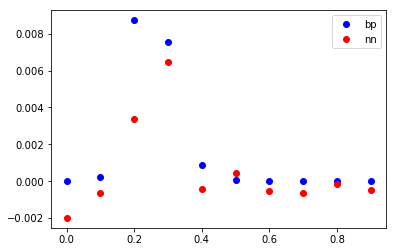

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
x = betas
m_ex = np.array(m_ex)
m_bp = np.array(m_bp)
m_nn = np.array(m_nn)

plt.plot(x, m_bp - m_ex, "bo", label="bp")
plt.plot(x, m_nn - m_ex, "ro", label="nn")
plt.legend()
plt.show()